# **데이터 가공 및 정제**

In [ ]:
import pandas as pd
df=pd.read_csv('fulldata.csv', encoding='cp949')

df = df[['상세영업상태코드', '소재지전체주소', '도로명전체주소', '사업장명', '업태구분명', '위생업태명']]

df = df[df.상세영업상태코드 == 1]
df = df.drop('상세영업상태코드', axis=1)

df = df.reset_index(drop=True)
df.to_csv('data.csv')

print(df)

<ipython-input-11-cd761f26363c>:2: DtypeWarning: Columns (11,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fulldata.csv', encoding='cp949')


                                          소재지전체주소  \
0                     경기도 하남시 선동 427 미사강변 더샵 리버포레   
1       인천광역시 중구 운서동 3094-2 더 예스 포레스트 2층 205,206호   
2                              부산광역시 동래구 온천동 96-5   
3                부산광역시 동래구 낙민동 326 포레나 동래 201동 7호   
4                            충청북도 증평군 증평읍 송산리 881   
...                                           ...   
697984                       광주광역시 서구 용두동 306번지 1   
697985                        광주광역시 남구 양림동 374 2층   
697986               광주광역시 남구 월산동 1048-182번지 (1층)   
697987                  광주광역시 서구 화정동 332-9번지 (1층)   
697988                    광주광역시 서구 화정동 70-61 (1층)   

                                                 도로명전체주소                사업장명  \
0         경기도 하남시 미사강변북로 65-1, 미사강변 더샵 리버포레 1층 101호 (선동)  33떡볶이&꼬마김밥 미사리버포레점   
1         인천광역시 중구 흰바위로 113, 더 예스 포레스트 2층 205,206호 (운서동)            중화요리 미식재   
2                   부산광역시 동래구 금강공원로26번길 29, 2층 일부호 (온천동)       웨이브라운지 바(Bar)   
3       부산광역시 동래구 온천천로339번길 51, 201동 1층 7호 

In [ ]:
import pandas as pd
df=pd.read_csv('data_ver1.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df['주소'] = df['소재지전체주소'].fillna(df['도로명전체주소']).apply(lambda x: x.split()[0])
df = df.reset_index(drop=True)

df.to_csv('data_ver2.csv')

print(df)

                                          소재지전체주소  \
0                     경기도 하남시 선동 427 미사강변 더샵 리버포레   
1       인천광역시 중구 운서동 3094-2 더 예스 포레스트 2층 205,206호   
2                              부산광역시 동래구 온천동 96-5   
3                부산광역시 동래구 낙민동 326 포레나 동래 201동 7호   
4                            충청북도 증평군 증평읍 송산리 881   
...                                           ...   
697984                       광주광역시 서구 용두동 306번지 1   
697985                        광주광역시 남구 양림동 374 2층   
697986               광주광역시 남구 월산동 1048-182번지 (1층)   
697987                  광주광역시 서구 화정동 332-9번지 (1층)   
697988                    광주광역시 서구 화정동 70-61 (1층)   

                                                 도로명전체주소                사업장명  \
0         경기도 하남시 미사강변북로 65-1, 미사강변 더샵 리버포레 1층 101호 (선동)  33떡볶이&꼬마김밥 미사리버포레점   
1         인천광역시 중구 흰바위로 113, 더 예스 포레스트 2층 205,206호 (운서동)            중화요리 미식재   
2                   부산광역시 동래구 금강공원로26번길 29, 2층 일부호 (온천동)       웨이브라운지 바(Bar)   
3       부산광역시 동래구 온천천로339번길 51, 201동 1층 7호 

In [ ]:
import pandas as pd
df=pd.read_csv('data_ver2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df = df[df.주소 == '서울특별시']

df['세부주소'] = df['소재지전체주소'].fillna(df['도로명전체주소']).apply(lambda x: x.split()[0] + ' ' + x.split()[1])
df = df.reset_index(drop=True)

df.to_csv('data_seoul.csv')

print(df)

                                 소재지전체주소  \
0                   서울특별시 마포구 서교동 346-34   
1                   서울특별시 마포구 망원동 416-14   
2                   서울특별시 마포구 서교동 332-27   
3               서울특별시 마포구 연남동 515-12 미스바   
4                    서울특별시 강북구 우이동 72-65   
...                                  ...   
124808  서울특별시 양천구 신정동 889-15 춘당아네시스 101호   
124809         서울특별시 양천구 신월동 534-25 정세빌딩   
124810               서울특별시 양천구 신월동 60-33   
124811              서울특별시 강북구 수유동 229-46   
124812               서울특별시 강북구 번동 415-19   

                                         도로명전체주소             사업장명 업태구분명 위생업태명  \
0               서울특별시 마포구 와우산로23길 48, 2,3층 (서교동)           (주)소과당    기타    기타   
1                    서울특별시 마포구 망원로4길 3, 2층 (망원동)            카페 화로    기타    기타   
2              서울특별시 마포구 와우산로29바길 11-3, 2층 (서교동)        럭키데이즈 홀덤펍    기타    기타   
3         서울특별시 마포구 연남로3길 10, 1층 101호 (연남동, 미스바)      한촉(HANCHOC)    기타    기타   
4                    서울특별시 강북구 삼양로 520, 2층 (우이동)           시트러스소다 

In [ ]:
import pandas as pd
df=pd.read_csv('data_ver2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df = df[df.주소 == '경기도']

df['세부주소'] = df['소재지전체주소'].fillna(df['도로명전체주소']).apply(lambda x: x.split()[0] + ' ' + x.split()[1])
df = df.reset_index(drop=True)

df.to_csv('data_gyeonggi.csv')

print(df)

                                  소재지전체주소  \
0             경기도 하남시 선동 427 미사강변 더샵 리버포레   
1           경기도 안산시 상록구 수암동 499-1 1층 101호   
2       경기도 안산시 상록구 본오동 873-7 리치스빌딩 1층 일부   
3                       경기도 하남시 감일동 514-4   
4                      경기도 파주시 금릉동 434-10   
...                                   ...   
150555        경기도 남양주시 퇴계원면 퇴계원리 255-35번지   
150556             경기도 남양주시 수동면 지둔리 229번지   
150557            경기도 남양주시 오남읍 오남리 48-4번지   
150558          경기도 의정부시 산곡동 686-1 폴리프라자Ⅰ   
150559            경기도 의정부시 의정부동 440-51 1층   

                                               도로명전체주소                사업장명  \
0       경기도 하남시 미사강변북로 65-1, 미사강변 더샵 리버포레 1층 101호 (선동)  33떡볶이&꼬마김밥 미사리버포레점   
1                   경기도 안산시 상록구 원당골1길 6, 1층 101호 (수암동)         국풍설렁탕(수암본점)   
2                경기도 안산시 상록구 본삼로 51, 리치스빌딩 1층 일부 (본오동)         심야스테이크 상록수점   
3                       경기도 하남시 감일로 140, 5층 502호 (감일동)                 그늘집   
4                        경기도 파주시 쇠재안길 66, 1층 일부호 (금릉동)               



# **시각화**


In [1]:
# -*- coding: utf-8 -*-
# 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

<ipython-input-10-7be7e92ef132>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


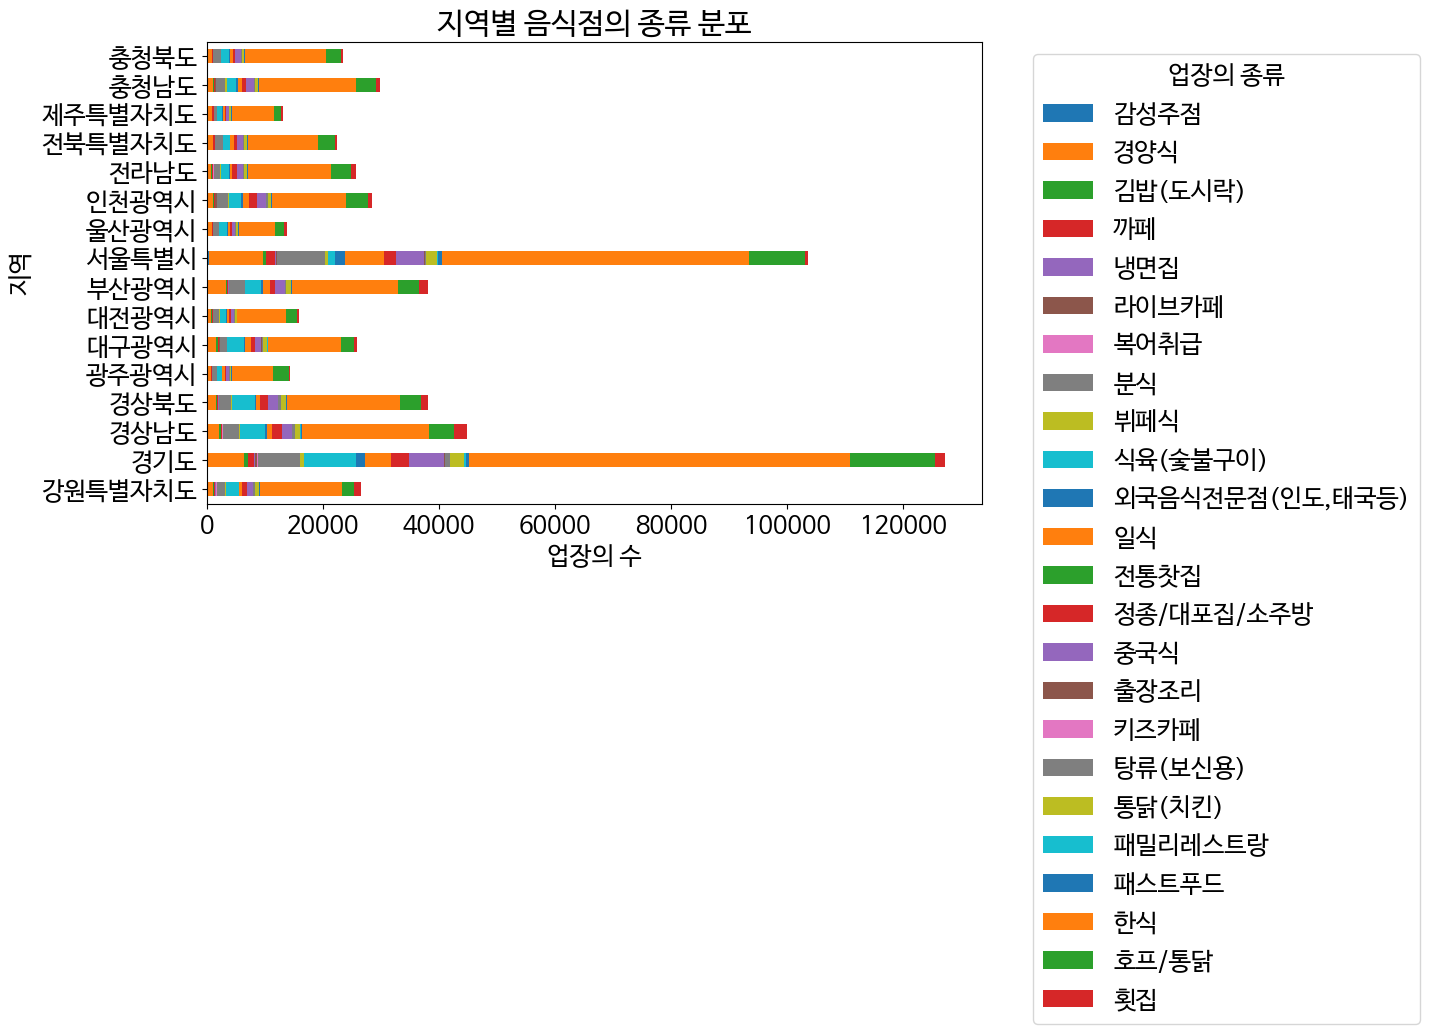

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
df=pd.read_csv('data_ver2.csv')
region_data = df.groupby(['주소', '업태구분명']).size().unstack(fill_value=0)

# 그래프 그리기
region_data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('지역별 음식점의 종류 분포')
plt.xlabel('업장의 수')
plt.ylabel('지역')
plt.legend(title='업장의 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

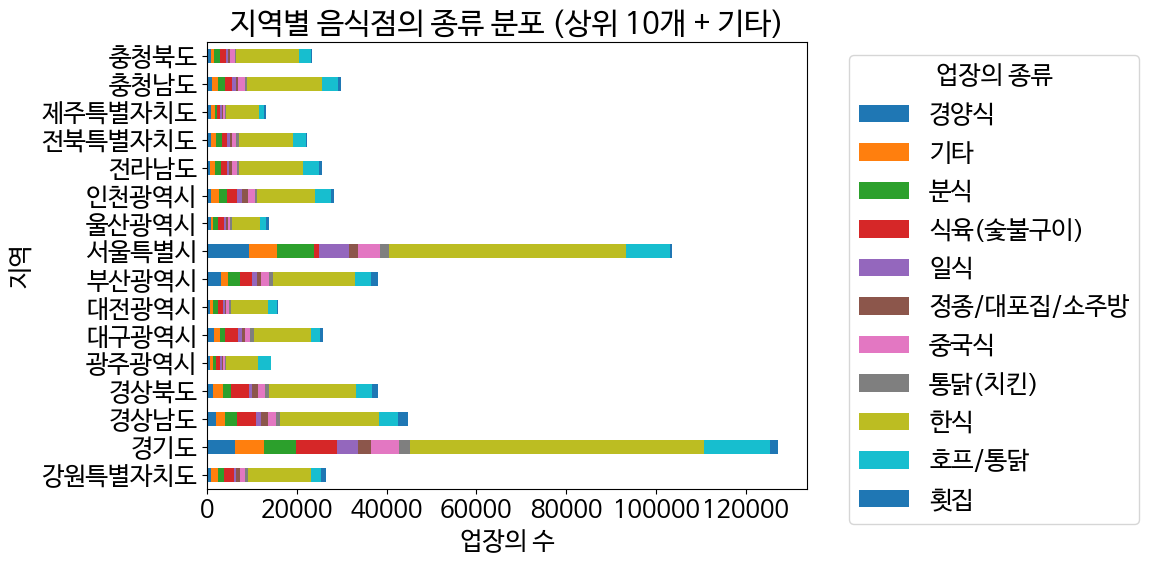

In [14]:
# 데이터 준비
df = pd.read_csv('data_ver2.csv')

# 업태구분명별로 전체 개수 계산
top_categories = df['업태구분명'].value_counts().head(10).index  # 상위 10개만 선택

# 상위 10개만 남기고 나머지는 "기타"로 묶기
df['업태구분명'] = df['업태구분명'].apply(lambda x: x if x in top_categories else '기타')

# 지역별 업태구분명 계산
region_data = df.groupby(['주소', '업태구분명']).size().unstack(fill_value=0)

# 그래프 그리기
region_data.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('지역별 음식점의 종류 분포 (상위 10개 + 기타)')
plt.xlabel('업장의 수')
plt.ylabel('지역')
plt.legend(title='업장의 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

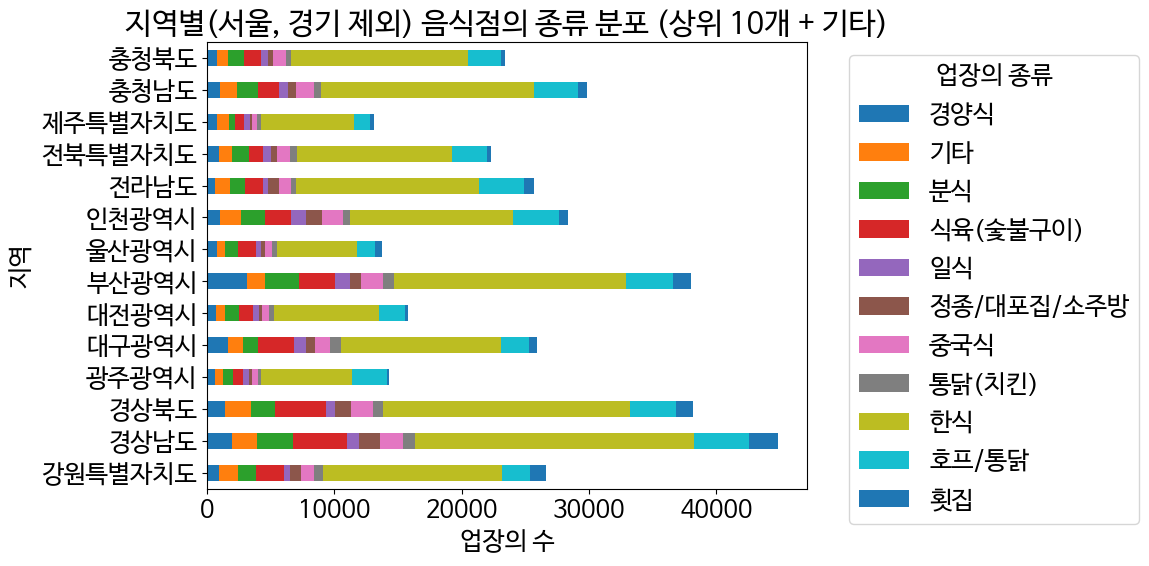

In [12]:
# 데이터 준비
df = pd.read_csv('data_ver2.csv')

# 업태구분명별로 전체 개수 계산
top_categories = df['업태구분명'].value_counts().head(10).index  # 상위 10개만 선택

# 상위 10개만 남기고 나머지는 "기타"로 묶기
df['업태구분명'] = df['업태구분명'].apply(lambda x: x if x in top_categories else '기타')

# 서울특별시와 경기도 제외
filtered_df = df[~df['주소'].str.contains('서울특별시|경기도', na=False)]

# 지역별 업태구분명 계산
region_data = filtered_df.groupby(['주소', '업태구분명']).size().unstack(fill_value=0)

# 그래프 그리기
region_data.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('지역별(서울, 경기 제외) 음식점의 종류 분포 (상위 10개 + 기타)')
plt.xlabel('업장의 수')
plt.ylabel('지역')
plt.legend(title='업장의 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

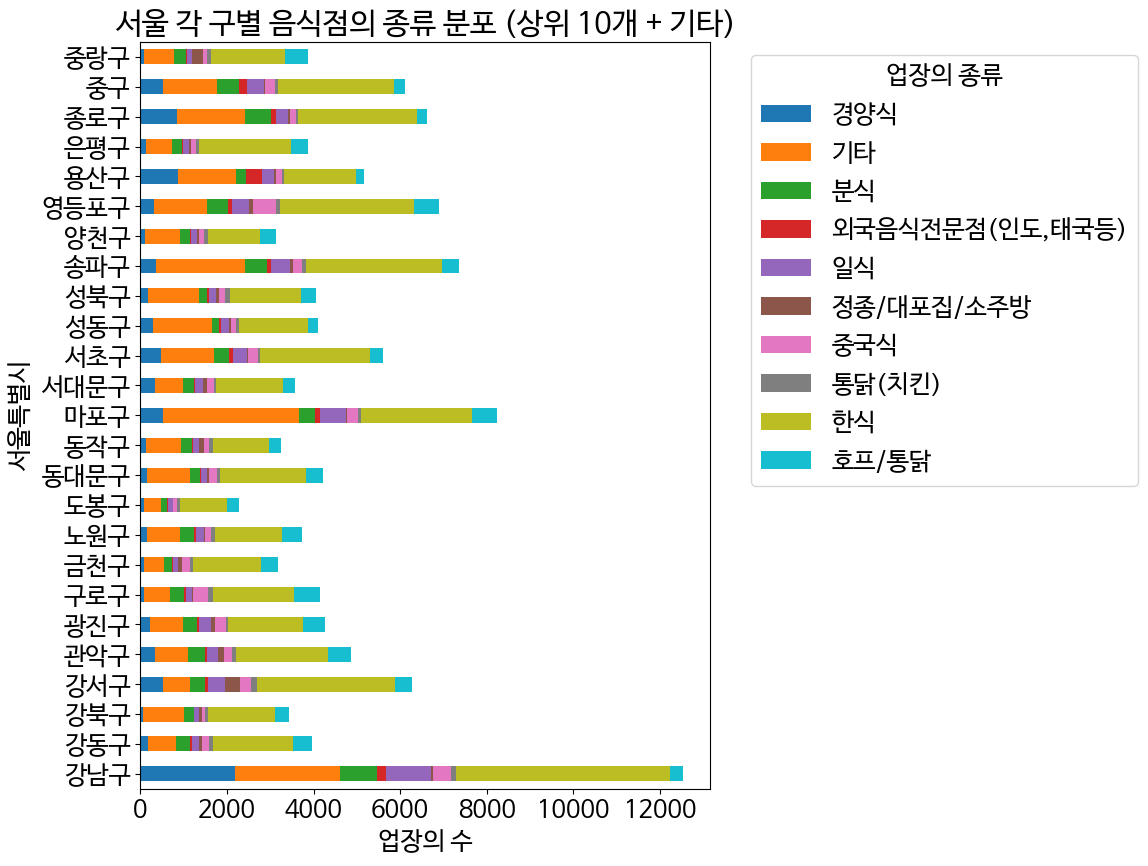

In [13]:
# 서울특별시 데이터 준비
df = pd.read_csv('data_seoul.csv')

# '세부주소'에서 '서울특별시'를 제거하고 구 이름만 추출
df['세부주소'] = df['세부주소'].str.replace('서울특별시 ', '', regex=False).str.split().str[0]

# 업태구분명별로 전체 개수 계산
top_categories = df['업태구분명'].value_counts().head(10).index  # 상위 10개만 선택

# 상위 10개만 남기고 나머지는 "기타"로 묶기
df['업태구분명'] = df['업태구분명'].apply(lambda x: x if x in top_categories else '기타')

# 지역별 업태구분명 계산
region_data = df.groupby(['세부주소', '업태구분명']).size().unstack(fill_value=0)

# 그래프 그리기
region_data.plot(kind='barh', stacked=True, figsize=(12, 9))
plt.title('서울 각 구별 음식점의 종류 분포 (상위 10개 + 기타)')
plt.xlabel('업장의 수')
plt.ylabel('서울특별시')
plt.legend(title='업장의 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

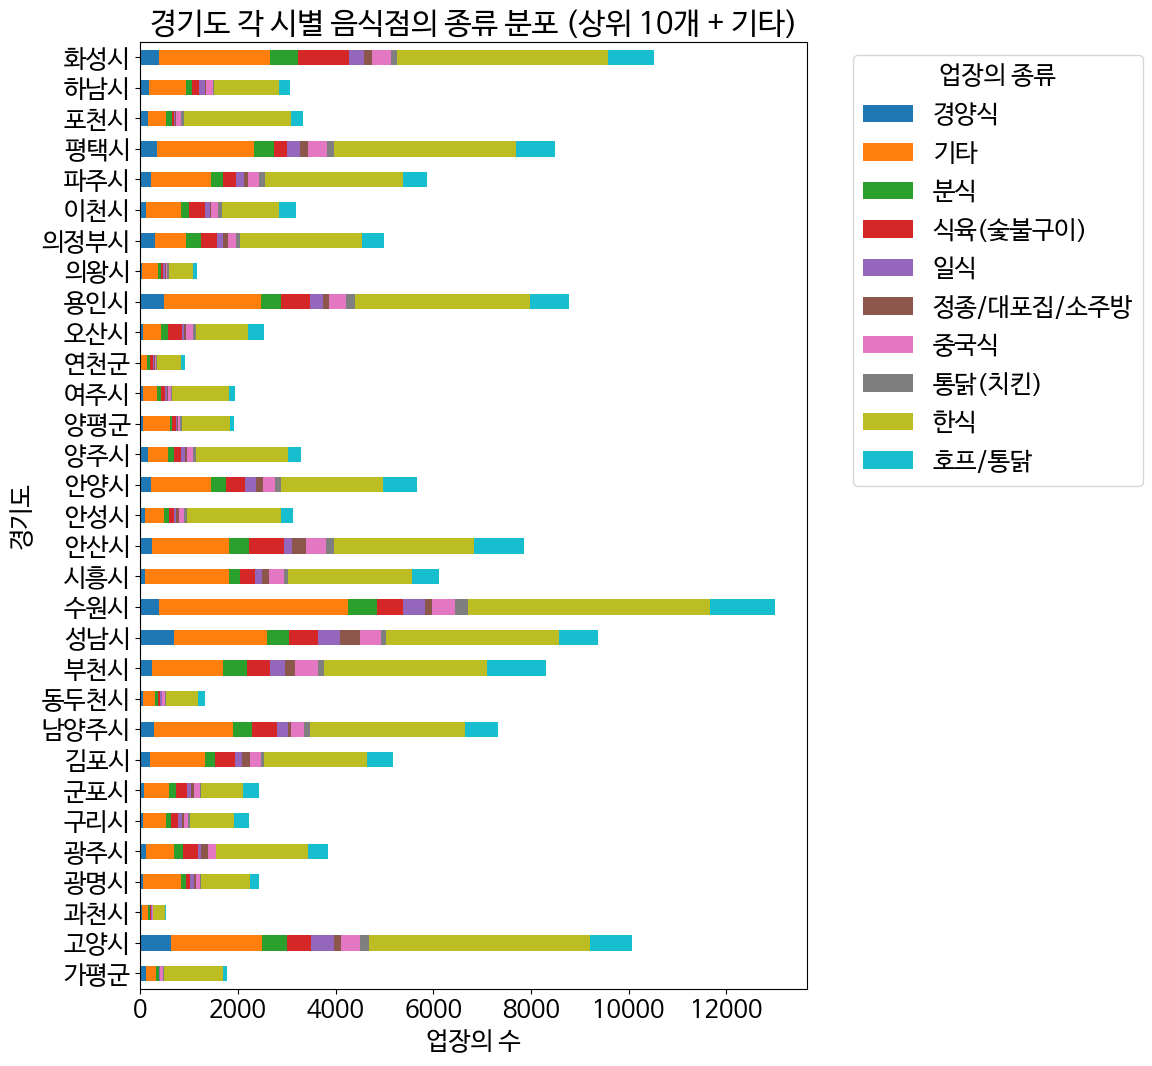

In [15]:
# 경기도 데이터 준비
df = pd.read_csv('data_gyeonggi.csv')

# '세부주소'에서 '경기도'를 제거하고 시 이름만 추출
df['세부주소'] = df['세부주소'].str.replace('경기도 ', '', regex=False).str.split().str[0]

# 업태구분명별로 전체 개수 계산
top_categories = df['업태구분명'].value_counts().head(10).index  # 상위 10개만 선택

# 상위 10개만 남기고 나머지는 "기타"로 묶기
df['업태구분명'] = df['업태구분명'].apply(lambda x: x if x in top_categories else '기타')

# 지역별 업태구분명 계산
region_data = df.groupby(['세부주소', '업태구분명']).size().unstack(fill_value=0)

# 그래프 그리기
region_data.plot(kind='barh', stacked=True, figsize=(12, 11))
plt.title('경기도 각 시별 음식점의 종류 분포 (상위 10개 + 기타)')
plt.xlabel('업장의 수')
plt.ylabel('경기도')
plt.legend(title='업장의 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()